In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import yt
##yt.mylog.setLevel()
yt.utilities.logger.disable_stream_logging()

# Varying the amplitude

For kh = 4 (2 periods across) and kv = 1 (1 period vertically),  considered result with A = 0.01, 0.001, 0.0001

You might not notice it just looking at movies of the `rhopert` evolution but when I measured the periods, I noticed something alarming

## An issue with (or revealed by?) lower amplitudes 

In [2]:
def quickProbePlot(kv_int,kh_int, dataDir):
    
    ts = yt.load(dataDir+"/plt000????/") # I'd love a way to make this quiet
    pointdata  = []
    time = []
    for ds in ts:
        pointdata.append(ds.point([1e9/2,1e9/2,0.])['rhopert'].value[0])
        time.append(float(ds.current_time))
    
    
    gamma = 5./3. 
    g = 3e4
    H = 1e9
    N2 = (gamma-1.)/gamma * g / H
    kv = kv_int * np.pi  / H
    kh = kh_int * np.pi / H
    k2 = kv**2 + kh**2 
    w2 = N2 * kh**2 / (k2 )
    w = np.sqrt(w2)
    
    print('kh_int=',kh_int)
    print('N=',np.sqrt(N2))
    print('w(expected)=',w)

    smoothTime = np.linspace(0,1e4,1e3)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(time, pointdata, '+r', time, pointdata, 'r',
        smoothTime, pointdata[0] * np.cos(-w * smoothTime), 'b',
        smoothTime, pointdata[0] * np.cos(-w*np.sqrt(2) * smoothTime), 'g')

    plt.show()
    
    return

In [3]:
def quickProbePlotNoAnalytics(kv_int,kh_int, dataDir):
    
    ts = yt.load(dataDir+"/plt000????/") # I'd love a way to make this quiet
    pointdata  = []
    time = []
    for ds in ts:
        pointdata.append(ds.point([1e9/2,1e9/2,0.])['rhopert'].value[0])
        time.append(float(ds.current_time))
    
    
    gamma = 5./3. 
    g = 3e4
    H = 1e9
    N2 = (gamma-1.)/gamma * g / H
    kv = kv_int * np.pi  / H
    kh = kh_int * np.pi / H
    k2 = kv**2 + kh**2 
    w2 = N2 * kh**2 / (k2 )
    w = np.sqrt(w2)
    
    print('kh_int=',kh_int)
    print('N=',np.sqrt(N2))
    print('w(expected)=',w)

    smoothTime = np.linspace(0,1e4,1e3)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(time, pointdata, '+r', time, pointdata, 'r')

    plt.show()
    
    return

### A = 0.01

kh_int= 2
N= 0.0034641016151377548
w(expected)= 0.0015491933384829666


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


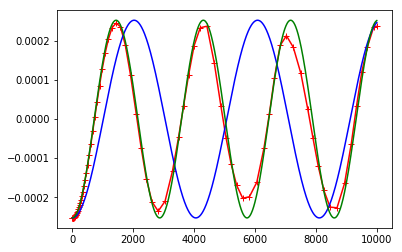

In [4]:
quickProbePlot(4,2,dataDir="../oldruns/fri14/ampTest/a_1e-2/")

### A = 0.001

kh_int= 2
N= 0.0034641016151377548
w(expected)= 0.0015491933384829666


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


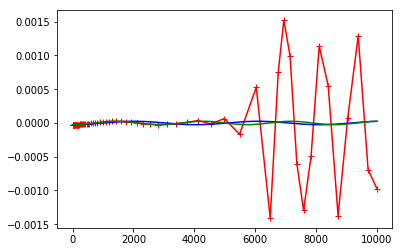

In [5]:
quickProbePlot(4,2,dataDir="../oldruns/fri14/ampTest/a_1e-3/")

### A = 0.0001

kh_int= 2
N= 0.0034641016151377548
w(expected)= 0.0015491933384829666


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


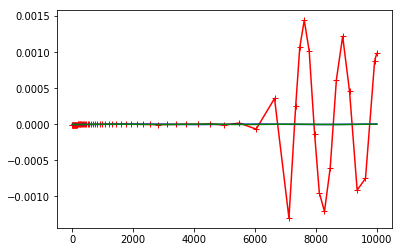

In [6]:
quickProbePlot(4,2,dataDir="../oldruns/fri14/ampTest/a_1e-4/")

### A = 0

Appears to remain stable on the above timescale and 10x it!?! (note different x-scale)

kh_int= 2
N= 0.0034641016151377548
w(expected)= 0.0015491933384829666


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


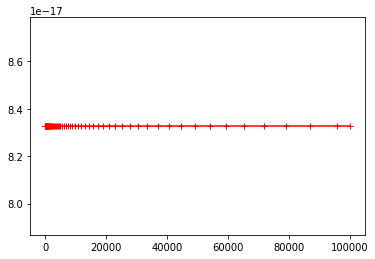

In [7]:
quickProbePlotNoAnalytics(4,2,dataDir="../oldruns/fri14/ampTest/a_0/")

If you uncomment the below (ctrl + / , maybe cmd + / on macos?)

you will get a timeseries of 2d `rhopert` plots showing that it is O(1e-16) at all times

In [8]:


# dataDir="../oldruns/fri14/ampTest/a_0/"

# # Load data as a time series
# ts = yt.load(dataDir+"/plt000????/") # I'd love a way to make this quiet

# var = "rhopert";
# filenum = 0
# fileprefix='testout/'

# for ds in ts:
#     plot = yt.SlicePlot(ds, "z", var);
#     plot.set_log(var, False);
#     plot.set_cmap(field=var, cmap='RdBu')
#     plot.annotate_title("t = {}".format(ds.current_time) )
#     filenum = filenum + 1
#     filename = "{}{:04}.png".format(fileprefix,filenum)
#     plot.show()
#     #plot.save(name=filename)


## What does the automatically selected dt look like in the apparently unstable and apparently stable choices of $A$ ? 

* run the $A=0.001$ case (unstable?), AND
* run the $A=0.01$ case (stable?)
* dumping every time step (avoid any sampling 'bias' in the analysis- every point we see is a step!)
* look at dt over the course of the simulation

In [9]:
def quickTimeDtPlot(dataDir):
    ts = yt.load(dataDir+"/plt000????/") # I'd love a way to make this quiet
    time = []
    for ds in ts:
        time.append(float(ds.current_time))

    dt = []
    for it, t in enumerate(time):
        try:
            dt.append(time[it+1]-t)
        except: # to avoid indexing oob on the last snapshot
            continue

    time.pop(); # remove the last element

    fig = plt.figure()
    ax = plt.axes()
    ax.plot(dt,'+')
    plt.xlabel('time step')
    plt.ylabel('dt')
    plt.show()

### what does auto dt look like $A=0.001$ case?

In [10]:
dataDir = "../oldruns/mon17/a0.001/autodt/"

kh_int= 2
N= 0.0034641016151377548
w(expected)= 0.0015491933384829666


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


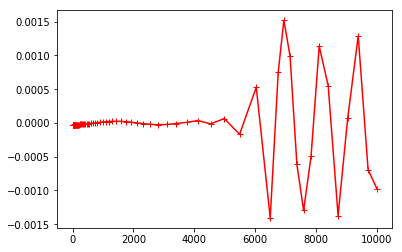

In [11]:
quickProbePlotNoAnalytics(4,2,dataDir)

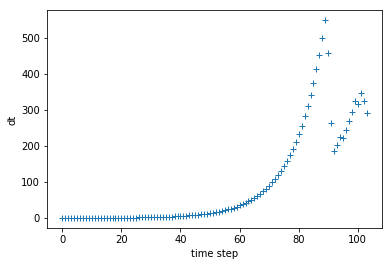

In [12]:
quickTimeDtPlot(dataDir)

### A=0.01 case

In [13]:
dataDir = "../oldruns/mon17/a0.01/autodt/"

kh_int= 2
N= 0.0034641016151377548
w(expected)= 0.0015491933384829666


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


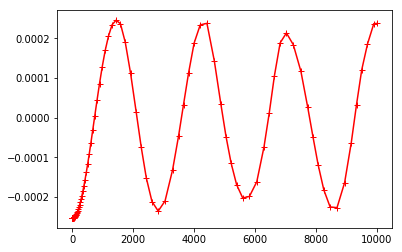

In [14]:
quickProbePlotNoAnalytics(4,2,dataDir)

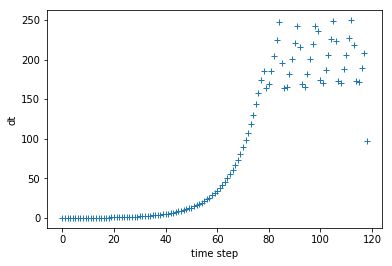

In [15]:
quickTimeDtPlot(dataDir)

## Experiments with `maestro.max_dt` 

This runtime parameter (default is huge, i.e. off) sets `dt` if the automatically selected values are larger than it. 

* Take $A=0.001$ (apparently unstable) case
* See if this can stabalise it 
* If so check for undesirable effects, such as
    * first few cycles no longer conforming closely to analytical
    * excessive dissapation
    * other?

### `maestro.max_dt = 250.0`

Chose this since the $A=0.01$ auto dt seems to hover around that mark. Looks like it sort of works, but it still looks a bit off (that could be something else though).

In [16]:
dataDir = "../oldruns/mon17/a0.001/maxdt_250/"

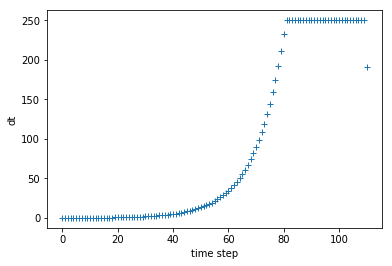

In [17]:
quickTimeDtPlot(dataDir)

kh_int= 2
N= 0.0034641016151377548
w(expected)= 0.0015491933384829666


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


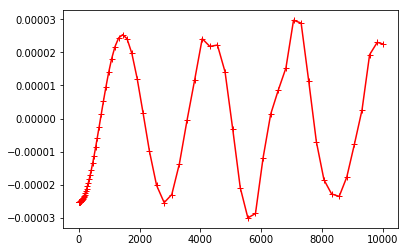

In [18]:
quickProbePlotNoAnalytics(4,2,dataDir)

Still unsure about that exponential growth - its just been cut off at max dt, but whatever causes it to happen in the first place is still there

### `maestro.max_dt = 100.0`

Chose this since the $A=0.01$ auto dt seems to hover around that mark. Looks like it sort of works, but it still looks a bit off (that could be something else though).

In [19]:
dataDir = "../oldruns/mon17/a0.001/maxdt_100/"

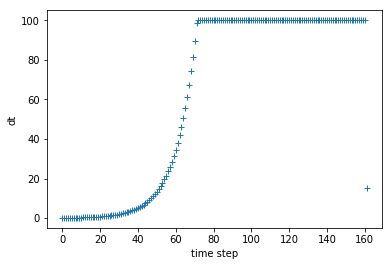

In [23]:
quickTimeDtPlot(dataDir)

kh_int= 2
N= 0.0034641016151377548
w(expected)= 0.0015491933384829666


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


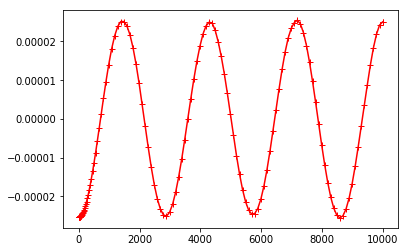

In [21]:
quickProbePlotNoAnalytics(4,2,dataDir)

That looks pretty smooth.

Adding the analytics..

kh_int= 2
N= 0.0034641016151377548
w(expected)= 0.0015491933384829666


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


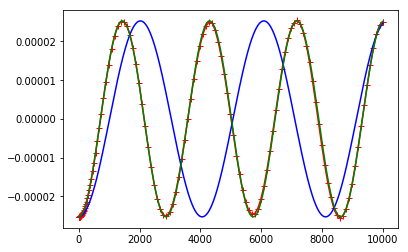

In [22]:
quickProbePlot(4,2,dataDir)

So there is pretty amazing agreement with the green curve, which is the analytical prediction if we allow for the mysterious $\sqrt{2}$ correction factor.